# Test postprocessing

In [1]:
# Add any possible locations of amr-wind-frontend here
amrwindfedirs = ['/projects/wind_uq/lcheung/amrwind-frontend/',
                 #'/ccs/proj/cfd162/lcheung/amr-wind-frontend.lcc/',
                 '/ccs/proj/cfd162/lcheung/amrwind-frontend/'
                ]
import sys, os, shutil, io
for x in amrwindfedirs: sys.path.insert(1, x)

import matplotlib.pyplot as plt
# Make all plots inline 
%matplotlib inline

In [2]:
import postproengine as ppeng	
import ruamel.yaml    
yaml = ruamel.yaml.YAML(typ='rt')
Loader= yaml.load
loaderkwargs = {}
dumperkwargs = {}

can't find the 'samwich' module


## Create circumferentially averaged radial profiles

In [3]:
yamlstring="""
globalattributes:
  verbose: True
  udfmodules:
  - testmod.py
  executeorder:
  - makeRprofiles:
    - avgplanes
    - reynoldsstress
    - plotcsv

makeRprofiles:
  avgplanes:
  - name: avg_rotorplane
    ncfile:
    - /lustre/orion/cfd162/world-shared/lcheung/AdvancedControlsWakes/Runs/LowWS_LowTI.Frontier/oneturb_7x2/rundir_baseline/post_processing/YZwake_35000.nc
    - /lustre/orion/cfd162/world-shared/lcheung/AdvancedControlsWakes/Runs/LowWS_LowTI.Frontier/oneturb_7x2/rundir_baseline/post_processing/YZwake_50000.nc
    - /lustre/orion/cfd162/world-shared/lcheung/AdvancedControlsWakes/Runs/LowWS_LowTI.Frontier/oneturb_7x2/rundir_baseline/post_processing/YZwake_65000.nc
    - /lustre/orion/cfd162/world-shared/lcheung/AdvancedControlsWakes/Runs/LowWS_LowTI.Frontier/oneturb_7x2/rundir_baseline/post_processing/YZwake_77500.nc
    tavg: [17800, 18500]
    savepklfile:  avg_smallYZplane.pkl         # Name of pickle file to save results (Optional, Default: '')
    #loadpklfile:  avg_smallYZplane.pkl
    group: T0_YZ_wake2              # Which group to pull from netcdf file (Optional, Default: None)
    plot:
      plotfunc: 'lambda u, v, w: np.sqrt(u**2 + v**2)'
      title: 'AVG horizontal velocity'
      xaxis: y           # Which axis to use on the abscissa 
      yaxis: z           # Which axis to use on the ordinate 
      iplane: [0,3]
    circavg:
      centerpoint: [480, 150.0] #[2340, 1000, 150] #[480, 150.0]
      r1: 5
      r2: 300
      Nr: 60
      theta1: 0.0
      theta2: 3.1415968
      iplane: [0,1,2,3, -1]
      pointcoordsystem: A1A2 #XYZ #A1A2
      varnames: ['velocityx_avg', 'velocityy_avg', 'velocityz_avg' ]
      savefile: YZwake_rprofile_{iplane}.csv
      
  reynoldsstress:
  - name: avg_rotorplane_TKE
    ncfile:
    - /lustre/orion/cfd162/world-shared/lcheung/AdvancedControlsWakes/Runs/LowWS_LowTI.Frontier/oneturb_7x2/rundir_baseline/post_processing/YZwake_35000.nc
    - /lustre/orion/cfd162/world-shared/lcheung/AdvancedControlsWakes/Runs/LowWS_LowTI.Frontier/oneturb_7x2/rundir_baseline/post_processing/YZwake_50000.nc
    - /lustre/orion/cfd162/world-shared/lcheung/AdvancedControlsWakes/Runs/LowWS_LowTI.Frontier/oneturb_7x2/rundir_baseline/post_processing/YZwake_65000.nc
    - /lustre/orion/cfd162/world-shared/lcheung/AdvancedControlsWakes/Runs/LowWS_LowTI.Frontier/oneturb_7x2/rundir_baseline/post_processing/YZwake_77500.nc
    tavg: [17800, 18500]
    savepklfile:  avg_smallYZplane_TKE.pkl         # Name of pickle file to save results (Optional, Default: '')
    #loadpklfile:  avg_smallYZplane.pkl
    group: T0_YZ_wake2              # Which group to pull from netcdf file (Optional, Default: None)
    contourplot:
      #plotfunc: 'lambda u, v, w: np.sqrt(u**2 + v**2)'
      title: 'AVG horizontal velocity'
      xaxis: y           # Which axis to use on the abscissa 
      yaxis: z           # Which axis to use on the ordinate 
      iplane: [0,3]
    circavg:
      centerpoint: [480, 150.0] #[2340, 1000, 150] #[480, 150.0]
      r1: 5
      r2: 300
      Nr: 60
      theta1: 0.0
      theta2: 3.1415968
      iplane: [0,1,2,3, -1]
      pointcoordsystem: A1A2 #XYZ #A1A2
      varnames: ['uu_avg', 'vv_avg', 'ww_avg' ]
      savefile: YZwake_rprofile_TKE_{iplane}.csv

  plotcsv:
  - name: plotUfiles
    xlabel: 'R [m]'
    ylabel: 'U [m/s]'
    title: 'Velocity profile'
    legendopts: {'loc':'upper left'}
    csvfiles:
    - {'file':'YZwake_rprofile_0.csv', 'xcol':'r', 'ycol':'velocityx_avg', 'lineopts':{'lw':2, 'label':'iplane=0'}}
    - {'file':'YZwake_rprofile_1.csv', 'xcol':'r', 'ycol':'velocityx_avg', 'lineopts':{'lw':2, 'label':'iplane=1'}}
    - {'file':'YZwake_rprofile_2.csv', 'xcol':'r', 'ycol':'velocityx_avg', 'lineopts':{'lw':2, 'label':'iplane=2'}}
    - {'file':'YZwake_rprofile_3.csv', 'xcol':'r', 'ycol':'velocityx_avg', 'lineopts':{'lw':2, 'label':'iplane=3'}}
    - {'file':'YZwake_rprofile_-1.csv', 'xcol':'r', 'ycol':'velocityx_avg', 'lineopts':{'lw':2, 'label':'iplane=-1'}}
  - name: plotTKEfiles
    xlabel: 'R [m]'
    ylabel: 'uu [m^2/s^2]'
    title: 'TKE profile'
    legendopts: {'loc':'upper left'}
    csvfiles:
    - {'file':'YZwake_rprofile_TKE_0.csv', 'xcol':'r', 'ycol':'uu_avg', 'lineopts':{'lw':2, 'label':'iplane=0'}}
    - {'file':'YZwake_rprofile_TKE_1.csv', 'xcol':'r', 'ycol':'uu_avg', 'lineopts':{'lw':2, 'label':'iplane=1'}}
    - {'file':'YZwake_rprofile_TKE_2.csv', 'xcol':'r', 'ycol':'uu_avg', 'lineopts':{'lw':2, 'label':'iplane=2'}}


"""
f = io.StringIO(yamlstring)
yamldict = Loader(f, **loaderkwargs)

Initialized avgplanes
Running avgplanes
/lustre/orion/cfd162/world-shared/lcheung/AdvancedControlsWakes/Runs/LowWS_LowTI.Frontier/oneturb_7x2/rundir_baseline/post_processing/YZwake_35000.nc 14
[============================================================] 100.0% 
/lustre/orion/cfd162/world-shared/lcheung/AdvancedControlsWakes/Runs/LowWS_LowTI.Frontier/oneturb_7x2/rundir_baseline/post_processing/YZwake_50000.nc 597
[============================================================] 99.8% 
/lustre/orion/cfd162/world-shared/lcheung/AdvancedControlsWakes/Runs/LowWS_LowTI.Frontier/oneturb_7x2/rundir_baseline/post_processing/YZwake_65000.nc 572
[============================================================] 99.8% 
/lustre/orion/cfd162/world-shared/lcheung/AdvancedControlsWakes/Runs/LowWS_LowTI.Frontier/oneturb_7x2/rundir_baseline/post_processing/YZwake_77500.nc 220
[============================================================] 99.5% 
Ncount = 1400

Initialized plot inside avgplanes
Executing plot


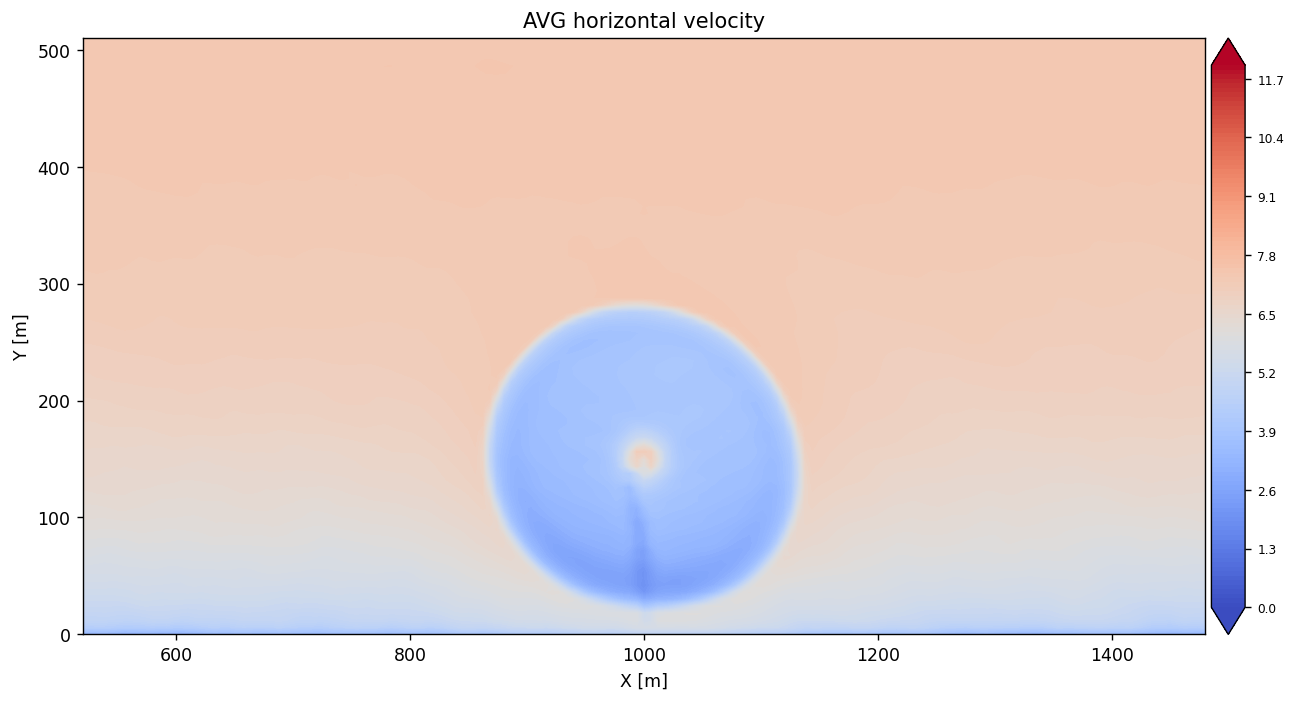

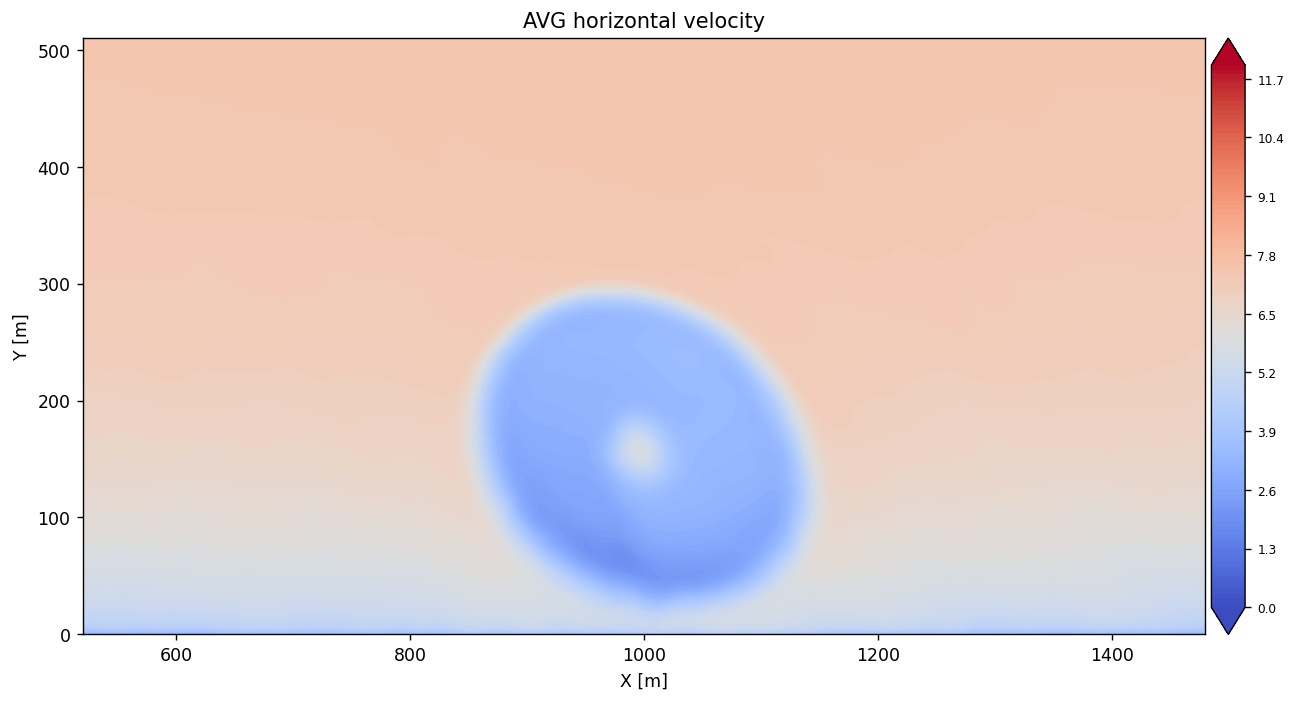

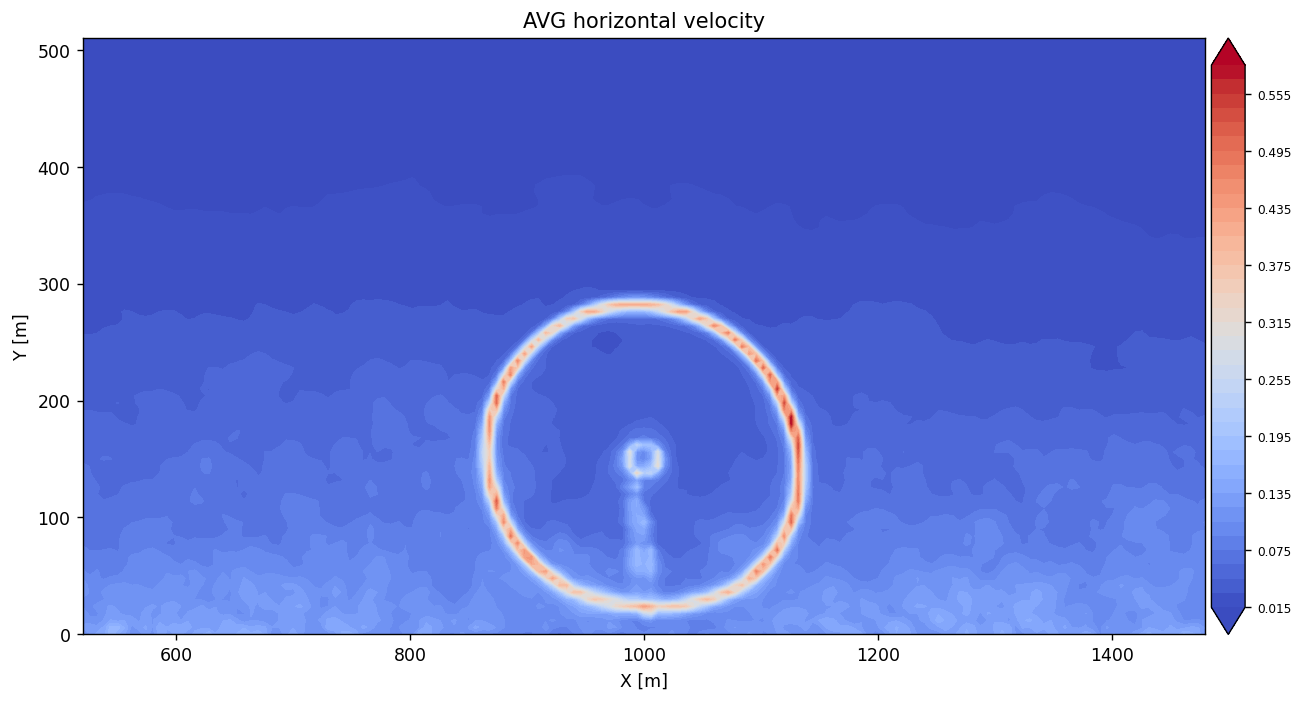

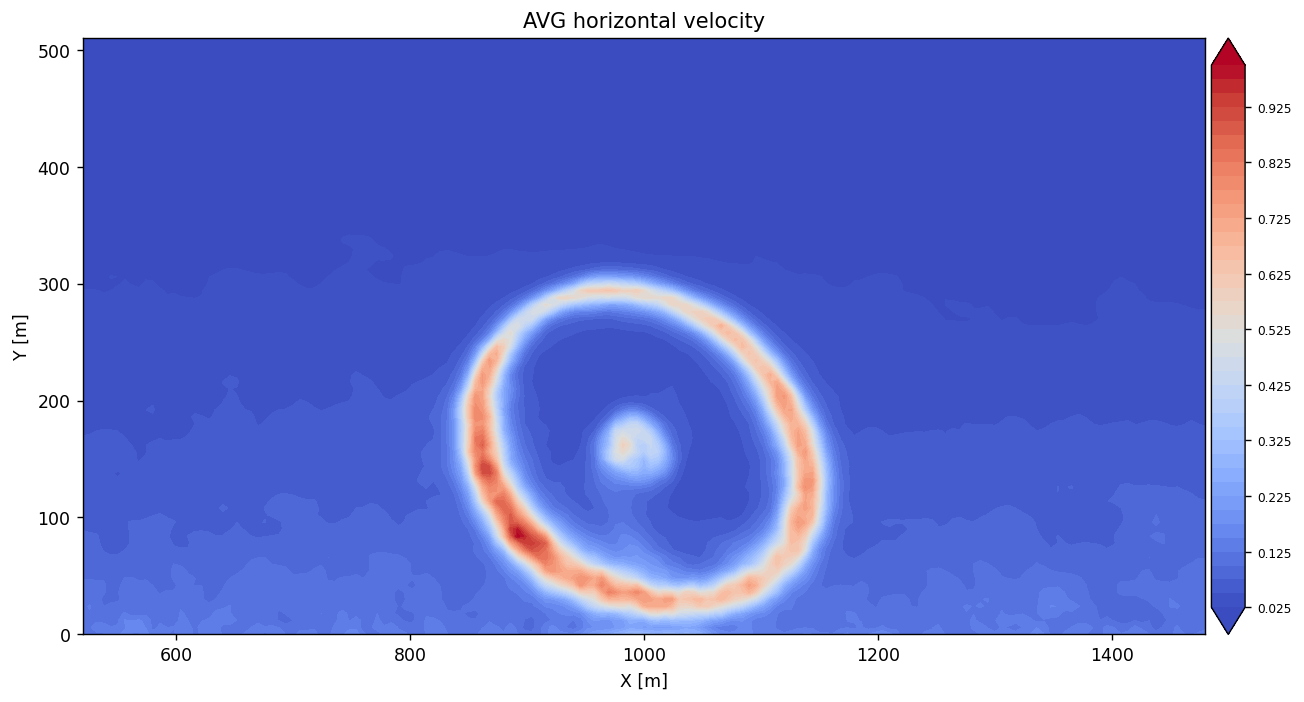

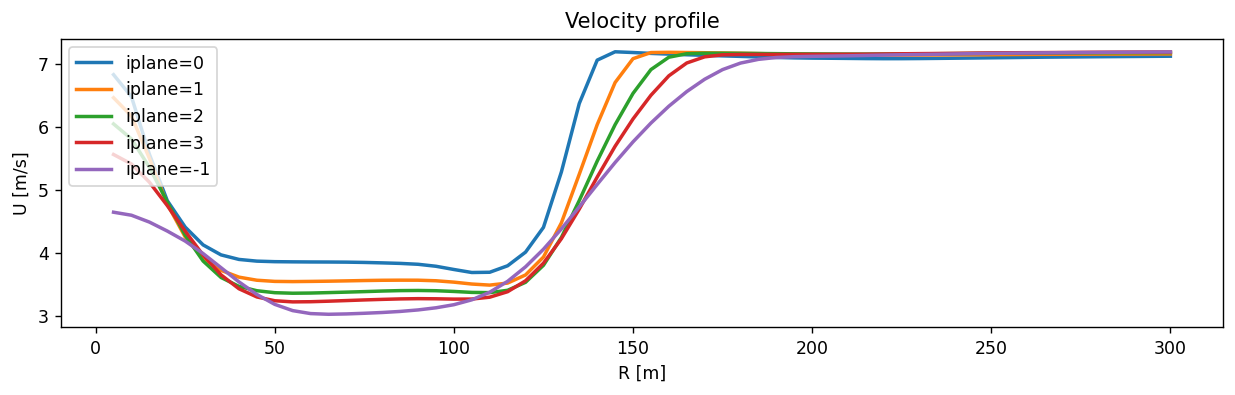

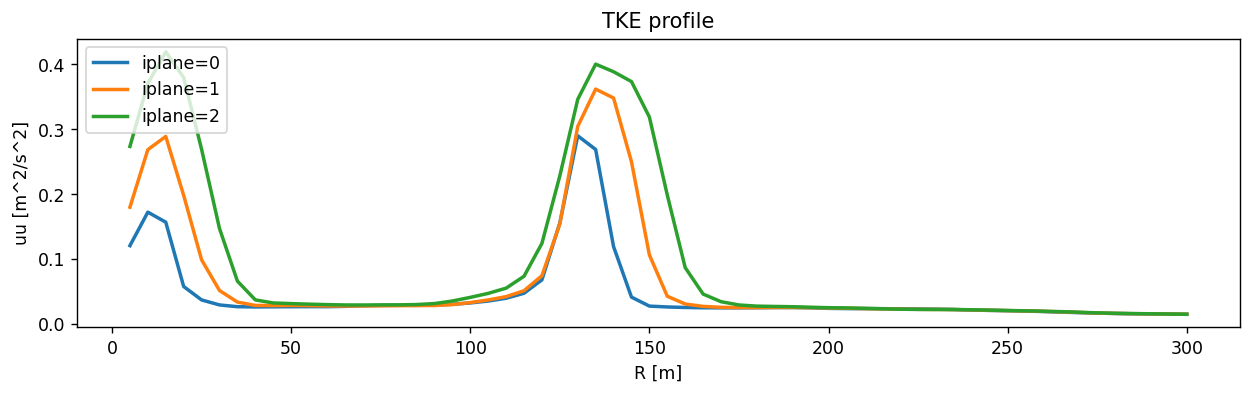

In [4]:
# Run the driver
%matplotlib inline
ppeng.driver(yamldict)

## Extract centerline velocity from HH sample planes

In [5]:
yamlstring="""
globalattributes:
  verbose: True
  udfmodules:
  - centerlineinterp.py
  executeorder:
  - workflow1:
    - instantaneousplanes  
#    - openfast
    - avgplanes       
    - plotcsv

workflow1:
  openfast:
  - name: [T0]
    filename: 
    - /lustre/orion/cfd162/world-shared/lcheung/AdvancedControlsWakes/Runs/LowWS_LowTI.Frontier/oneturb_7x2/rundir_baseline/T0_OpenFAST3p5_IEA15MW/IEA-15-240-RWT-Monopile/IEA-15-240-RWT-Monopile.out
    vars:
    - Time
    - BldPitch1
    - RotSpeed
    - GenPwr
    # output_dir: OpenFAST
    csv:  # Store information to CSV files
      individual_files: False   
      
  instantaneousplanes:
  - name: smallXYplane
    ncfile: /lustre/orion/cfd162/world-shared/lcheung/AdvancedControlsWakes/Runs/LowWS_LowTI.Frontier/oneturb_7x2/rundir_baseline/post_processing/XY_77500.nc
    iters:  [-1]
    iplane: 1
    xaxis: x
    yaxis: y
    # --- optional stuff here ---
    #times: [28000, 28100, 28450]
    title: 'XY Horizontal velocity T={time:0.2f}'
    plotfunc: "lambda u, v, w: np.sqrt(u**2 + v**2)"    
    clevels: 'np.linspace(0, 12, 121)'
    xlabel: 'X [m]'
    ylabel: 'Y [m]'

  avgplanes:
  - name: avg_smallXYplane
    ncfile:
    - /lustre/orion/cfd162/world-shared/lcheung/AdvancedControlsWakes/Runs/LowWS_LowTI.Frontier/oneturb_7x2/rundir_baseline/post_processing/XY_35000.nc
    - /lustre/orion/cfd162/world-shared/lcheung/AdvancedControlsWakes/Runs/LowWS_LowTI.Frontier/oneturb_7x2/rundir_baseline/post_processing/XY_50000.nc
    - /lustre/orion/cfd162/world-shared/lcheung/AdvancedControlsWakes/Runs/LowWS_LowTI.Frontier/oneturb_7x2/rundir_baseline/post_processing/XY_65000.nc    
    - /lustre/orion/cfd162/world-shared/lcheung/AdvancedControlsWakes/Runs/LowWS_LowTI.Frontier/oneturb_7x2/rundir_baseline/post_processing/XY_77500.nc
    tavg: [17800, 18500]
    savepklfile:  avg_smallXYplane.pkl         # Name of pickle file to save results (Optional, Default: '')
    #loadpklfile:  avg_smallXYplane.pkl
    #group               : Which group to pull from netcdf file (Optional, Default: None)
    plot:
      plotfunc: 'lambda u, v, w: np.sqrt(u**2 + v**2)'
      title: 'AVG horizontal velocity'
      xaxis: x           # Which axis to use on the abscissa 
      yaxis: y           # Which axis to use on the ordinate 
      iplane: 1    
    interpolate:
      pointlocationfunction: centerlineinterp.centerline
      pointcoordsystem: XYZ
      varnames: [velocityx_avg, velocityy_avg, velocityz_avg]
      iplane: 1
      savefile: centerline.csv
  plotcsv:
  - name: plotCL
    xlabel: 'X [m]'
    ylabel: 'U [m/s]'
    title: 'Velocity profile'
    legendopts: {'loc':'upper right'}
    csvfiles:
    - {'file':'centerline.csv', 'xcol':'x', 'ycol':'velocityx_avg', 'lineopts':{'lw':2, 'label':'U'}}

plotcsv:
  - name: plotfiles
    xlabel: 'Time [s]'
    ylabel: 'Power [MW]'
    title: 'Turbine power'
    legendopts: {'loc':'upper left'}
    csvfiles:
    - {'file':'T0.csv', 'xcol':'Time', 'ycol':'GenPwr', 'lineopts':{'color':'r', 'lw':2, 'label':'T0'}}
  - name: plotRPM
    figsize: [6,6]
    xlabel: 'Time [s]'
    ylabel: 'Rotor speed [rpm]'
    title: 'Turbine rotor speed'
    postplotfunc: testmod.foobar
    csvfiles:
    - {'file':'T0.csv', 'xcol':'Time', 'ycol':'RotSpeed', 'lineopts':{'color':'r', 'lw':2, 'label':'T0'}}
    
"""
f = io.StringIO(yamlstring)
yamldict = Loader(f, **loaderkwargs)

Initialized instantaneousplanes
Running instantaneousplanes
extracting iter -1
Initialized avgplanes
Running avgplanes
/lustre/orion/cfd162/world-shared/lcheung/AdvancedControlsWakes/Runs/LowWS_LowTI.Frontier/oneturb_7x2/rundir_baseline/post_processing/XY_35000.nc 14
[============================================================] 100.0% 
/lustre/orion/cfd162/world-shared/lcheung/AdvancedControlsWakes/Runs/LowWS_LowTI.Frontier/oneturb_7x2/rundir_baseline/post_processing/XY_50000.nc 597
[============================================================] 99.8% 
/lustre/orion/cfd162/world-shared/lcheung/AdvancedControlsWakes/Runs/LowWS_LowTI.Frontier/oneturb_7x2/rundir_baseline/post_processing/XY_65000.nc 572
[============================================================] 99.8% 
/lustre/orion/cfd162/world-shared/lcheung/AdvancedControlsWakes/Runs/LowWS_LowTI.Frontier/oneturb_7x2/rundir_baseline/post_processing/XY_77500.nc 220
[============================================================] 99.5% 
N

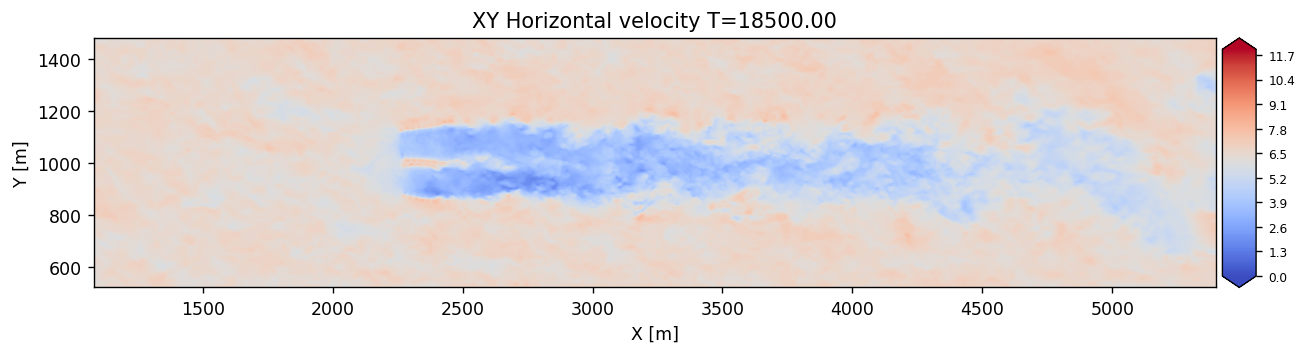

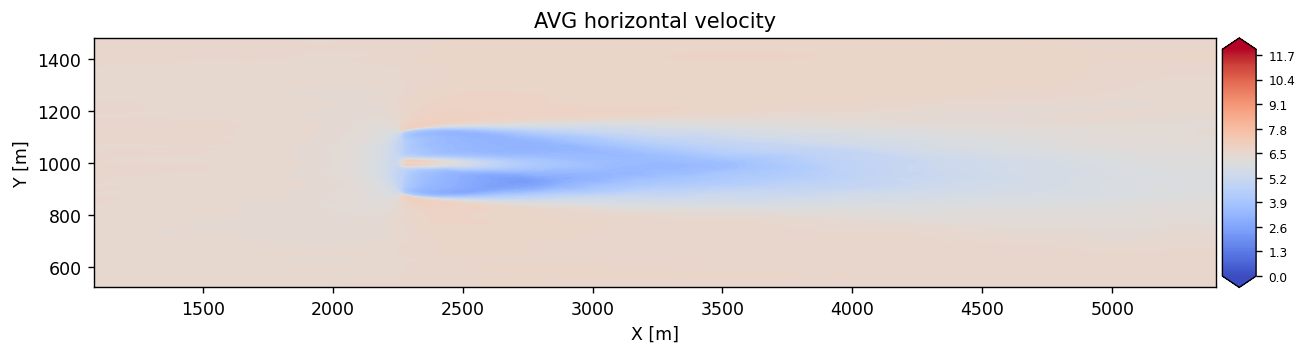

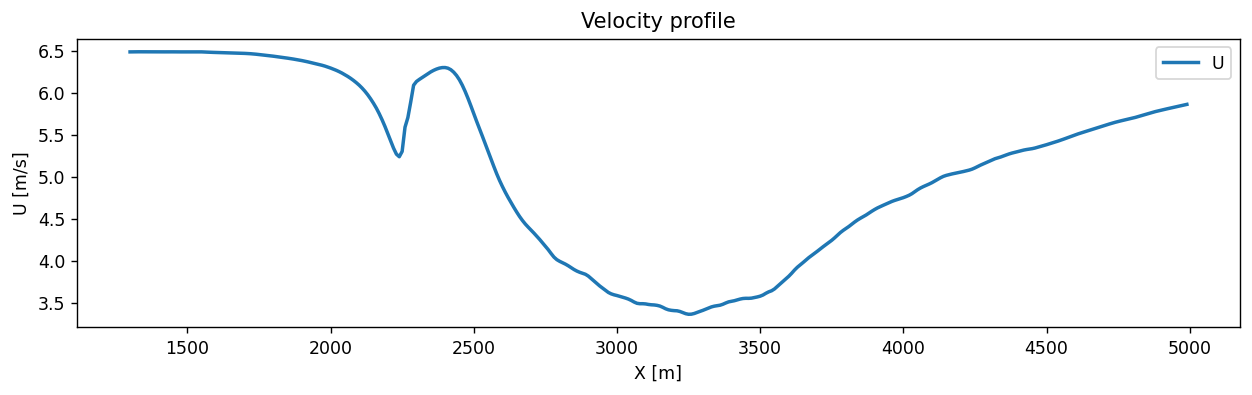

In [6]:
# Run the driver
%matplotlib inline
ppeng.driver(yamldict)

## Compute momentum and displacement thicknesses

In [7]:
yamlstring="""
globalattributes:
  verbose: True
  executeorder:
  - calc_deltamom:
    - avgplanes

calc_deltamom:
  avgplanes:
  - name: avg_noturb
    ncfile:
    - /lustre/orion/cfd162/world-shared/lcheung/AdvancedControlsWakes/Runs/LowWS_LowTI.Frontier/oneturb_7x2/rundir_noturbs/post_processing/YZwake_35000.nc
    - /lustre/orion/cfd162/world-shared/lcheung/AdvancedControlsWakes/Runs/LowWS_LowTI.Frontier/oneturb_7x2/rundir_noturbs/post_processing/YZwake_47500.nc
    - /lustre/orion/cfd162/world-shared/lcheung/AdvancedControlsWakes/Runs/LowWS_LowTI.Frontier/oneturb_7x2/rundir_noturbs/post_processing/YZwake_57500.nc
    - /lustre/orion/cfd162/world-shared/lcheung/AdvancedControlsWakes/Runs/LowWS_LowTI.Frontier/oneturb_7x2/rundir_noturbs/post_processing/YZwake_67500.nc
    - /lustre/orion/cfd162/world-shared/lcheung/AdvancedControlsWakes/Runs/LowWS_LowTI.Frontier/oneturb_7x2/rundir_noturbs/post_processing/YZwake_77500.nc
    tavg: [17800, 18500]
    savepklfile:  avg_smallYZplane_noturb.pkl         # Name of pickle file to save results (Optional, Default: '')
    group: T0_YZ_wake2       
  - name: avg_rotorplane
    ncfile:
    - /lustre/orion/cfd162/world-shared/lcheung/AdvancedControlsWakes/Runs/LowWS_LowTI.Frontier/oneturb_7x2/rundir_baseline/post_processing/YZwake_35000.nc
    - /lustre/orion/cfd162/world-shared/lcheung/AdvancedControlsWakes/Runs/LowWS_LowTI.Frontier/oneturb_7x2/rundir_baseline/post_processing/YZwake_50000.nc
    - /lustre/orion/cfd162/world-shared/lcheung/AdvancedControlsWakes/Runs/LowWS_LowTI.Frontier/oneturb_7x2/rundir_baseline/post_processing/YZwake_65000.nc
    - /lustre/orion/cfd162/world-shared/lcheung/AdvancedControlsWakes/Runs/LowWS_LowTI.Frontier/oneturb_7x2/rundir_baseline/post_processing/YZwake_77500.nc
    tavg: [17800, 18500]
    savepklfile:  avg_smallYZplane.pkl         # Name of pickle file to save results (Optional, Default: '')
    #loadpklfile:  avg_smallYZplane.pkl
    group: T0_YZ_wake2              # Which group to pull from netcdf file (Optional, Default: None)

    wakeThickness:       # ACTION: Computes the wake displacement and momentum thickness (Optional)
      iplane: [0,1,2,3,4,5]  # List of iplane values (Required)
      noturbine_pkl_file:  avg_smallYZplane_noturb.pkl 
      #U_inf             : constant value for U_inf for cases with uniform inflow (Optional, Default: None)
      savefile: wakethickness.csv



"""
f = io.StringIO(yamlstring)
yamldict = Loader(f, **loaderkwargs)

In [8]:
# Run the driver
%matplotlib inline
ppeng.driver(yamldict)

Initialized avgplanes
Running avgplanes
/lustre/orion/cfd162/world-shared/lcheung/AdvancedControlsWakes/Runs/LowWS_LowTI.Frontier/oneturb_7x2/rundir_noturbs/post_processing/YZwake_35000.nc 0

/lustre/orion/cfd162/world-shared/lcheung/AdvancedControlsWakes/Runs/LowWS_LowTI.Frontier/oneturb_7x2/rundir_noturbs/post_processing/YZwake_47500.nc 371
[============================================================] 100.0% 
/lustre/orion/cfd162/world-shared/lcheung/AdvancedControlsWakes/Runs/LowWS_LowTI.Frontier/oneturb_7x2/rundir_noturbs/post_processing/YZwake_57500.nc 401
[============================================================] 99.8% 
/lustre/orion/cfd162/world-shared/lcheung/AdvancedControlsWakes/Runs/LowWS_LowTI.Frontier/oneturb_7x2/rundir_noturbs/post_processing/YZwake_67500.nc 390
[============================================================] 99.7% 
/lustre/orion/cfd162/world-shared/lcheung/AdvancedControlsWakes/Runs/LowWS_LowTI.Frontier/oneturb_7x2/rundir_noturbs/post_processing/YZwak